In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import odeint,quad,simps,trapezoid,cumtrapz
from scipy.special import eval_hermite,eval_hermitenorm,erfinv
from scipy.misc import derivative
from math import sqrt,sin,pi,cos,exp,log,factorial
from scipy.spatial import KDTree
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import tikzplotlib
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
display(HTML("<style>.container { width:95% !important; }</style>"))

$$dX^{(1)}_t = -X_t dt + \sqrt{2D}dW_t$$


In [2]:
def V(x1,x2,k=4):
    r = np.sqrt(x1**2 + x2**2) 
    phi = np.arctan2(x2,x1)
    return(np.cos(k*phi) + 1/np.cos(0.5 * phi) +10*(r-1)**2 + 1/r)
def dV(X,k=4):
    r = np.linalg.norm(X,axis=-1)
    phi = np.arctan2(X[...,1],X[...,0]) 
    dx1 = np.cos(phi) * (20*(r-1) - 1/r**2) - (1/r)*np.sin(phi)*(-k*np.sin(k*phi) +0.5*((1/np.cos(0.5 *phi))*np.tan(0.5 *phi)))
    dx2 = np.sin(phi) * (20*(r-1) - 1/r**2) + (1/r)*np.cos(phi)*(-k*np.sin(k*phi) +0.5*((1/np.cos(0.5 *phi))*np.tan(0.5 *phi)))
    return(np.array([dx1,dx2]))

In [3]:
def sim_sde(D=1,n=100000,dt = 0.0001):
    W = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,2))
    Z = np.zeros((n,2))
    Z[0,...] = 1
    for i in range(1,n):
        Z_1 = Z[i-1,...]
        Z[i,...] = Z_1 - dV(Z_1)*dt + np.sqrt(2*D) * W[i,:]
    return(Z)

In [67]:
n = int(2e7)
dt = 1e-3
T = n*dt
D = 1
np.random.seed(1)
X = sim_sde(D=D,n=n,dt=dt)

In [68]:
np.save("2DQTrajectory.npy", X)

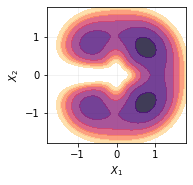

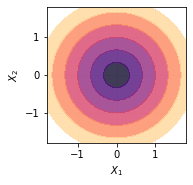

In [273]:
setting = 'off'
pgf_switch(setting)

x = np.linspace(-1.8, 1.8, 150)
y = np.linspace(-1.8, 1.8, 150)

X1, X2 = np.meshgrid(x, y)
Z = V(X1, X2,k=4)
plt.figure(figsize=(2.5,2.5))
plt.contourf(X1, X2, Z,levels=np.linspace(0,10,7),alpha=0.8,zorder=2,cmap='magma');
plt.xlim(-1.8,1.8)
plt.ylim(-1.8,1.8)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(alpha=0.2)

if setting == 'on':
    _ = plt.savefig(figures_route + '2dQWPotential.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()
    
Z =np.sqrt(X1**2 + X2**2)
plt.figure(figsize=(2.5,2.5))
plt.contourf(X1, X2, Z,levels=np.linspace(0,2,7),alpha=0.8,zorder=2,cmap='magma');
plt.xlim(-1.8,1.8)
plt.ylim(-1.8,1.8)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(alpha=0.2)

if setting == 'on':
    _ = plt.savefig(figures_route + '2dOUPotential.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

In [70]:
X = X[np.linalg.norm(X,axis=1)<10,:]
n = len(X)

In [73]:
N = 10000
np.random.seed(1)
X_s = X[np.random.choice(range(n),size=N),:]

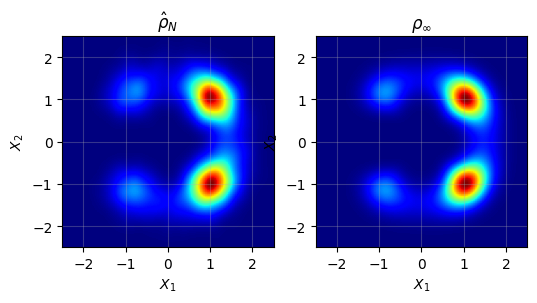

In [75]:
setting = 'off'
pgf_switch(setting)
g_kde  = sp.stats.gaussian_kde(X_s.T,0.15)
def rho_inf(x,y,D):
    norm = V(x,y)
    frac = 1
    expo = np.exp(-norm/(D))
    return frac * expo
x = np.linspace(-1.8, 1.8, 120)
y = np.linspace(-1.8, 1.8, 120)
r1 = np.zeros((120,120))
for i,_x in enumerate(x):
    for j,_y in enumerate(x):
        r1[i,j] = g_kde([_y,_x])[0]
X1, X2 = np.meshgrid(x, y)
r2 =rho_inf(X1,X2,D)

fig,axs = plt.subplots(1,2,figsize=(6,3),dpi=100)
axs[0].imshow(r1,extent=[-2.5,2.5,-2.5,2.5],cmap='jet')
axs[0].set_xlabel('$X_1$')
axs[0].set_ylabel('$X_2$')
axs[0].set_title("$\\hat{\\rho}_N$")
axs[0].grid(alpha=0.3)

axs[1].imshow(r2,extent=[-2.5,2.5,-2.5,2.5],cmap='jet',norm = colors.Normalize(vmin=0, vmax=np.max(r2)))
axs[1].set_title("$\\rho_{\infty}$")
axs[1].set_xlabel('$X_1$')
axs[1].set_ylabel('$X_2$')
axs[1].grid(alpha=0.3)

epsilon = 8.97e-04
d = 1.92


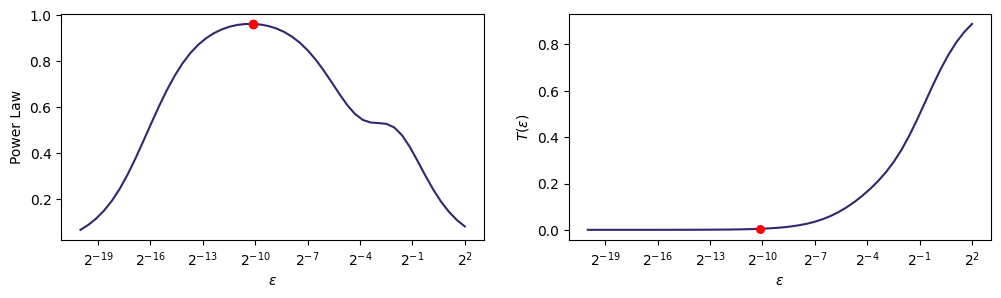

In [76]:
epsilon, d = bandwidth_search(X_s,plot=True,verbose=True)

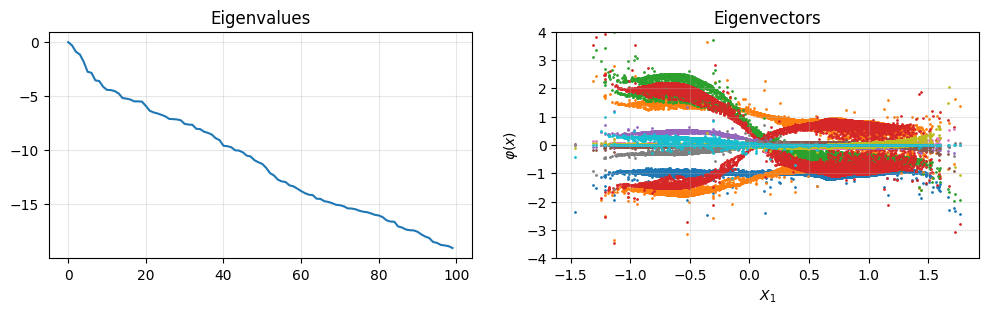

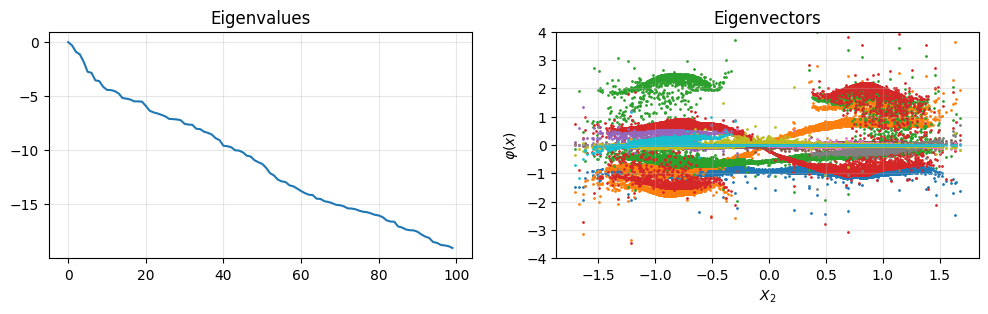

In [77]:
l, phi,L_e, U = KNPGenerator(X_s,M=100,plot=True,return_extra=True,epsilon=epsilon,d=d,epsilon_0 = 0.15)
phi_1 = np.linalg.pinv(phi)

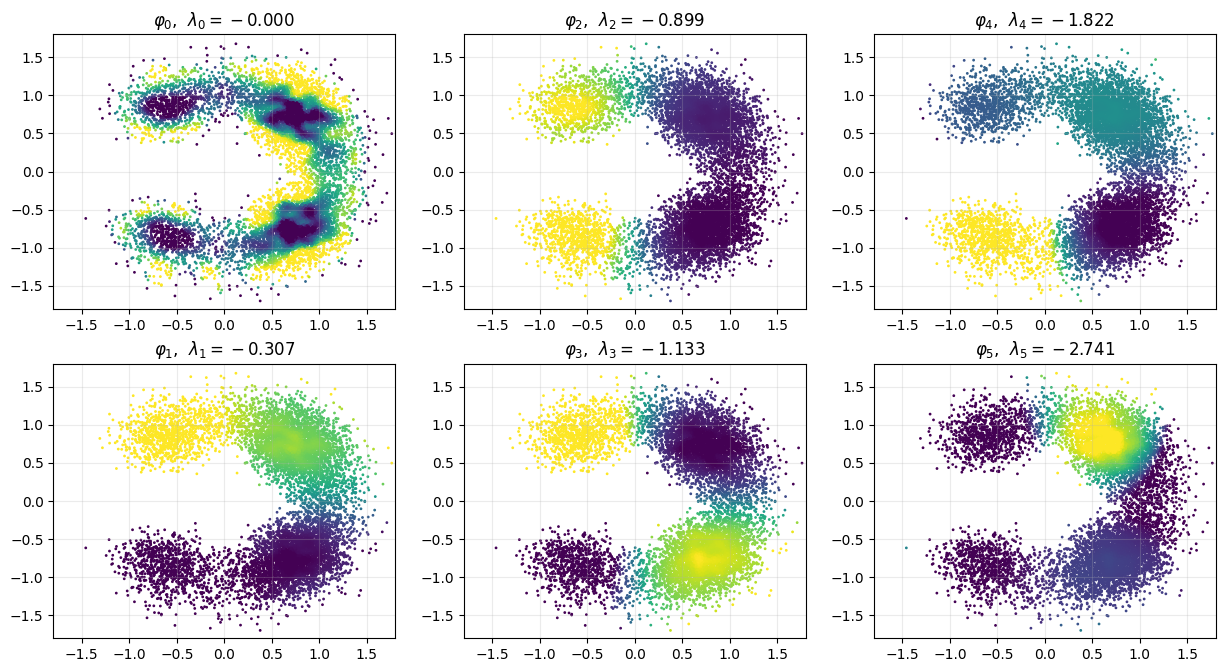

In [243]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=100)
jj=1
ll= 0
for i,elle in enumerate(range(6)):
    axs[i%2,int(i / 2)].set_title(f"$\\varphi_{i}$,  $ \lambda_{{{i+ll}}} = {l[i+ll]:.3f}$")
    axs[i%2,int(i / 2)].scatter(X_s[::jj,0],X_s[::jj,1],s=1,c=U[::jj,i+ll],
                                norm = colors.Normalize(vmin=np.quantile(U[::jj,i+ll],0.2), vmax=np.quantile(U[::jj,i+ll],0.9)))
    axs[i%2,int(i / 2)].grid(alpha=0.25)
    axs[i%2,int(i / 2)].set_xlim(-1.8,1.8)
    axs[i%2,int(i / 2)].set_ylim(-1.8,1.8)

In [79]:
l1,phi1 = np.linalg.eig(L_e)
phi1 = phi1 / np.linalg.norm(phi1,axis=0) * np.sqrt(np.shape(phi1)[1])   
phi_11 = np.linalg.pinv(phi1)

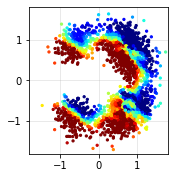

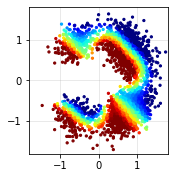

In [274]:
setting = 'off'
pgf_switch(setting)
ii = 3
Lf = lambda x,y : dV(np.array([x,y])),
r3 =- np.sum(dV(X_s[::ii,:])*X_s[::ii,:].T,axis=0)

Y = X_s[:,1] + X_s[:,0]
c_coef = (1/N) * (Y @ U)
c_coef1 = (D) * phi_11 @ Y
plt.figure(figsize=(2.5,2.7))
plt.scatter(X_s[::ii,0],X_s[::ii,1],s=5,c=(L_e@Y)[::ii],cmap='jet',norm = colors.Normalize(vmin=np.quantile(r3,0.15), vmax=np.quantile(r3,0.95)),zorder=2)
plt.grid(alpha=0.35,zorder=1)
plt.xlim(-1.8,1.8)
plt.ylim(-1.8,1.8)
# plt.xlabel('$X_1$')
# plt.ylabel('$X_2$')
if setting == 'on':
    _ = plt.savefig(figures_route + '2dDWtest_1.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

plt.figure(figsize=(2.5,2.7))

plt.scatter(X_s[::ii,0],X_s[::ii,1],s=5,c= - np.sum(dV(X_s),axis=0)[::ii],cmap='jet',norm = colors.Normalize(vmin=np.quantile(r3,0.15), vmax=np.quantile(r3,0.95)),zorder=2)

plt.grid(alpha=0.35,zorder=1)
plt.xlim(-1.8,1.8)
plt.ylim(-1.8,1.8)
# plt.xlabel('$X_1$')
# plt.ylabel('$X_2$')
if setting == 'on':
    _ = plt.savefig(figures_route + '2dDWtest_2.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

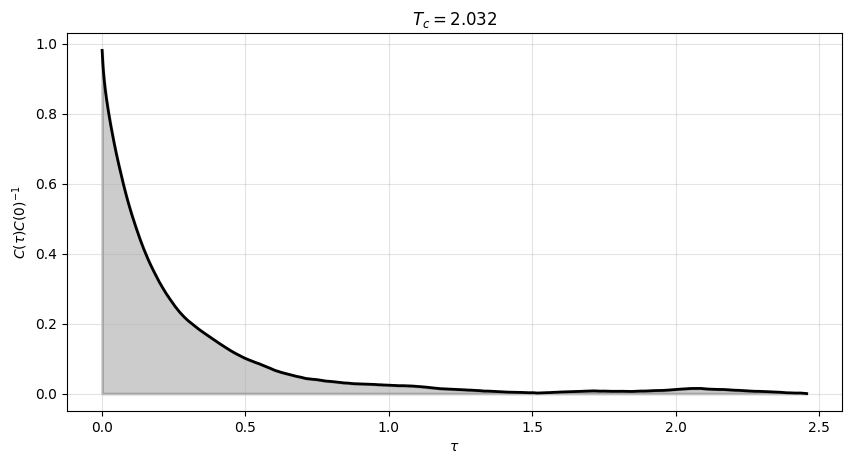

In [262]:
setting = 'off'
pgf_switch(setting)
S = np.sum(X[::10,:] - X[::10,:].mean(axis=0),axis=1)
n = len(S)
C_tau=np.zeros(n)
C0 = (1/n) * np.sum(S**2)
for j in range(1,n):
    if 1/(n-j)*sum(S[:n-j]*S[j:]) > 0:
        C_tau[j] = 1/(n-j)*sum(S[:n-j]*S[j:])
    else:
        break
C_tau = C_tau[C_tau>0]
pv = len(C_tau)
Tc = simps(x=np.linspace(0,n*dt*10,n)[:pv],y= C_tau / C0)

_ = plt.figure(figsize=(10,5),dpi=100)
_ = plt.grid(alpha=0.35)
_ = plt.plot(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2)
_ = plt.fill_between(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2,alpha=0.2)
_ = plt.xlabel('$\\tau$')
_ = plt.ylabel('$C(\\tau) C(0)^{-1}$')
_ = plt.title(f'$T_c = {Tc:.3f}$')

In [263]:
S = np.sum(X_s - X_s.mean(axis=0),axis=1)
s1 = np.sum((1/np.sort(l1)[:-1]) * (phi_11[np.argsort(l1),:] @ S)[:-1]**2)
s2 = np.sum((phi_11[np.argsort(l1),:] @ S)[:-1]**2)
D_hat = - (1/Tc)* (s1/s2)
D_hat

1.146586909199049